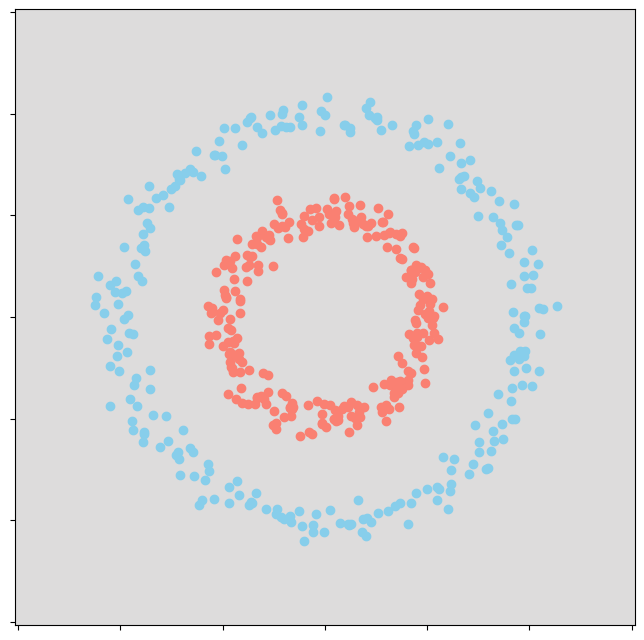

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

# Modelo con Tensorflow

In [42]:
import tensorflow as tf

from matplotlib import animation
from IPython import display
from IPython.core.display import HTML

tf.compat.v1.disable_eager_execution()
iX = tf.compat.v1.placeholder('float', shape=(None,X.shape[1]))
iY = tf.compat.v1.placeholder('float', shape=(None))

nn = [2,16,8,1] # numero de neuronas por capa
lr = 0.1 # Learning Rate del optimizador

# Capa 1
W1 = tf.Variable(tf.random.normal([nn[0],nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random.normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random.normal([nn[1],nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random.normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random.normal([nn[2],nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random.normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:,0]

# Evaluación de las predicciones
loss = tf.losses.mean_squared_error(pY,iY)

# Creamos el optimizador que entrenará a la red
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

n_steps = 1000 #numero de pasos para entrenar nuestra red

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(n_steps):
        _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX: X, iY: Y})

        if step % 25 == 0:
            acc = np.mean(np.round(_pY) == Y)
            print(f'Step {step} / n_steps - loss = {_loss} Acc {acc}')

Step 0 / n_steps - loss = 0.4062211513519287 Acc 0.514
Step 25 / n_steps - loss = 0.19681276381015778 Acc 0.768
Step 50 / n_steps - loss = 0.13730312883853912 Acc 0.876
Step 75 / n_steps - loss = 0.10403627902269363 Acc 0.956
Step 100 / n_steps - loss = 0.08115881681442261 Acc 0.968
Step 125 / n_steps - loss = 0.06518237292766571 Acc 0.976
Step 150 / n_steps - loss = 0.053180184215307236 Acc 0.982
Step 175 / n_steps - loss = 0.04384315758943558 Acc 0.99
Step 200 / n_steps - loss = 0.036506082862615585 Acc 0.996
Step 225 / n_steps - loss = 0.03066946007311344 Acc 0.996
Step 250 / n_steps - loss = 0.026122724637389183 Acc 0.998
Step 275 / n_steps - loss = 0.0225544273853302 Acc 0.998
Step 300 / n_steps - loss = 0.019664283841848373 Acc 1.0
Step 325 / n_steps - loss = 0.0172706451267004 Acc 1.0
Step 350 / n_steps - loss = 0.015210403129458427 Acc 1.0
Step 375 / n_steps - loss = 0.01350527536123991 Acc 1.0
Step 400 / n_steps - loss = 0.01207707542926073 Acc 1.0
Step 425 / n_steps - loss = 

# Modelo con Keras

In [54]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.1           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(optimizer='sgd', loss='mse', metrics=['acc'])

# Entrenamos al modelo. Los callbacks 
model.fit(X, Y, epochs=550)

C:\Users\Cenni\AppData\Local\Temp\ipykernel_9448\494411642.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Train on 500 samples
Epoch 1/550
500/500 [==============================] - 0s 520us/sample - loss: 0.2587 - acc: 0.5000
Epoch 2/550
500/500 [==============================] - 0s 40us/sample - loss: 0.2582 - acc: 0.5000
Epoch 3/550
500/500 [==============================] - 0s 54us/sample - loss: 0.2578 - acc: 0.5000
Epoch 4/550
500/500 [==============================] - 0s 60us/sample - loss: 0.2573 - acc: 0.5000
Epoch 5/550
500/500 [==============================] - 0s 42us/sample - loss: 0.2568 - acc: 0.4900
Epoch 6/550
500/500 [==============================] - 0s 44us/sample - loss: 0.2564 - acc: 0.4580
Epoch 7/550
500/500 [==============================] - 0s 52us/sample - loss: 0.2560 - acc: 0.4340
Epoch 8/550
500/500 [==============================] - 0s 58us/sample - loss: 0.2555 - acc: 0.4180
Epoch 9/550
500/500 [==============================] - 0s 64us/sample - loss: 0.2551 - acc: 0.4080
Epoch 10/550
500/500 [==============================] - 0s 36us/sample - loss: 0.2547 -